## How to read ERA5 data

In [ ]:
import cdsapi
import cartopy.crs as ccrs
import xarray as xr
from urllib.request import urlopen
c = cdsapi.Client()
# dataset to read

In [ ]:
# dataset to read
dataset = 'reanalysis-era5-pressure-levels'
# flag to download data
download_flag = False
# api parameters 
params = {
    'format': 'netcdf',
    'product_type': 'reanalysis',
    'variable': 'temperature',
    'pressure_level':'1000',
    'year':['2020'],
    'month':['01','02','03'],
    'day': ['01'],
    'time': ['12:00'],
    'grid': [0.25, 0.25],
    'area': [49.38, -124.67, 25.84, -66.95],
    }
# retrieves the path to the file
fl = c.retrieve(dataset, params)
# download the file 
if download_flag:
    fl.download("./output.nc")
# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

In [17]:
# dataset to read
dataset = 'reanalysis-era5-single-levels'
# flag to download data
download_flag = False
# api parameters 
params = {
    'format': 'netcdf',
    'product_type': 'reanalysis',
    'variable': ['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature'],
    'year':['2021'],
    'month': ['01', '02', '03', '04', '05', '06','07', '08', '09','10', '11', '12'],
    'day': ['01', '02', '03',
        '04', '05', '06',
        '07', '08', '09',
        '10', '11', '12',
        '13', '14', '15',
        '16', '17', '18',
        '19', '20', '21',
        '22', '23', '24',
        '25', '26', '27',
        '28', '29', '30',
        '31',
           ],
    'area': [90, -180, 60,180],
    'time': ['12:00'],
    'grid': [1, 0.5],
    'area': [90, -180, 60, 180],
    }

# retrieves the path to the file
fl = c.retrieve(dataset, params)

# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

2023-06-20 15:51:12,861 INFO Welcome to the CDS
2023-06-20 15:51:12,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-06-20 15:51:12,990 INFO Request is queued
2023-06-20 15:51:14,112 INFO Request is running
2023-06-20 15:52:03,206 INFO Request is completed


In [31]:
ds['t2m']

<xarray.DataArray 't2m' (time: 365, latitude: 61, longitude: 360)>
[8015400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... 61.5 61.0 60.5 60.0
  * time       (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-12-31T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [34]:
air

<xarray.DataArray 't2m' (time: 3, latitude: 61, longitude: 360)>
array([[[ -7.8230896,  -7.8230896,  -7.8230896, ...,  -7.8230896,
          -7.8230896,  -7.8230896],
        [ -8.536652 ,  -8.524994 ,  -8.5147705, ...,  -8.567322 ,
          -8.558563 ,  -8.54541  ],
        [ -9.218109 ,  -9.206451 ,  -9.194763 , ...,  -9.247314 ,
          -9.237091 ,  -9.2283325],
        ...,
        [  1.8252869,   1.8311157,   1.7727661, ...,   0.8213501,
           1.1569519,   1.6428833],
        [  2.035431 ,   2.098175 ,   2.0821228, ...,   1.2095032,
           1.7173157,   1.9551697],
        [  1.5436707,   1.6589355,   2.03833  , ...,   1.412323 ,
           1.9084778,   1.7990112]],

       [[  1.0533752,   1.0533752,   1.0533752, ...,   1.0533752,
           1.0533752,   1.0533752],
        [  1.0446167,   1.0489807,   1.0504456, ...,   1.0387573,
           1.041687 ,   1.0431519],
        [  1.0504456,   1.0504456,   1.0504456, ...,   1.0446167,
           1.0475159,   1.0489807],
...
        [  6.796875 ,   7.1543884,   7.6519775, ...,   6.4378967,
           6.685974 ,   6.693268 ],
        [  7.3265686,   7.444763 ,   7.599457 , ...,   6.6815796,
           6.9617615,   7.2054443],
        [  7.3732605,   7.3893127,   7.4184875, ...,   6.953003 ,
           7.196686 ,   7.311981 ]],

       [[-23.263168 , -23.263168 , -23.263168 , ..., -23.263168 ,
         -23.263168 , -23.263168 ],
        [-23.543335 , -23.531662 , -23.519989 , ..., -23.57544  ,
         -23.563766 , -23.552094 ],
        [-23.331741 , -23.318619 , -23.302567 , ..., -23.398865 ,
         -23.37407  , -23.353638 ],
        ...,
        [ -5.321991 ,  -5.3292847,  -5.73349  , ...,  -7.1518555,
          -6.71994  ,  -5.926117 ],
        [ -4.0524597,  -4.3107605,  -4.583618 , ...,  -5.148346 ,
          -4.650757 ,  -4.1867065],
        [ -3.06604  ,  -3.3155518,  -3.6351318, ...,  -3.6365967,
          -3.1929932,  -3.067505 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... 61.5 61.0 60.5 60.0
  * time       (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-12-31T12:00:00

C:\Users\kooal\AppData\Local\Temp\ipykernel_19284\571447181.py:15: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


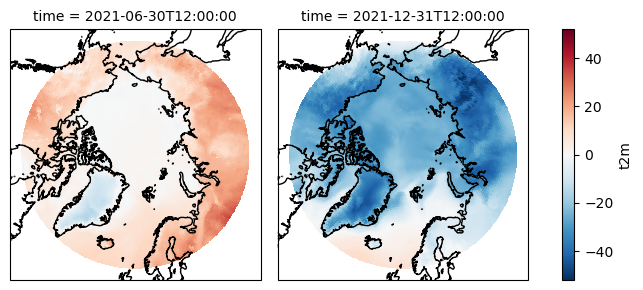

In [38]:
air = ds.t2m.isel(time=[180, 364]) - 273.15

# This is the map projection we want to plot *onto*
map_proj = ccrs.NorthPolarStereo()

p = air.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    col="time",
    col_wrap=2,  # multiplot settings
    # aspect=ds.dims["longitude"] / ds.dims["latitude"],  # for a sensible figsize
    subplot_kws={"projection": map_proj},
)  # the plot's projection

# We have to set the map's options on all axes
for ax in p.axes.flat:
    ax.coastlines()
    # ax.set_extent([-180, 50, 180, 90])